In [1]:
import numpy as np
import scipy.spatial
import scipy.ndimage

In [2]:
x = np.arange(10)

In [3]:
tree = scipy.spatial.KDTree(tuple(zip(x, x)))
tree.data

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [4]:
dists, indices = tree.query([[0, 1], [0, 2]], k=4)

In [5]:
indices[1].shape

(4,)

In [6]:
dists[1][1:].sum()

7.16227766016838

In [7]:
dummy_density_map = np.zeros((5, 5))
dummy_density_map[:, 2] = 1

In [8]:
gaussian = scipy.ndimage.gaussian_filter(dummy_density_map, sigma=1)

In [9]:
import matplotlib.pyplot as plt

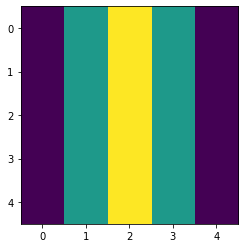

In [10]:
plt.imshow(gaussian)

In [11]:
import sys
import os

In [12]:
sys.path.append('..')

In [13]:
from density_map.k_nearest_gaussian_kernel import density_map_generator

In [14]:
dm = density_map_generator((240, 352), [(120, 150), (125, 135), (132, 119), (142, 104)])

In [15]:
from datasets.CityCam_maker import parse_xml

In [16]:
(h, w), points = parse_xml('../CityCam/164/164-20160223-09/000001.xml')

In [19]:
from datasets.CityCam_maker import make_density_map

In [ ]:
make_density_map